In [88]:
import pandas as pd
import numpy as np

# B1
b1_data = pd.DataFrame({
            'Team': [
                '北海道', 
                '秋田', 
                '宇都宮', 
                '千葉', 
                'A東京', 
                'SR渋谷', 
                '川崎',
                '横浜', 
                '新潟', 
                '富山', 
                '三遠',
                '三河',
                '名古屋D',
                '滋賀',
                '京都',
                '大阪',
                '福岡',
                '琉球'
            ],
            'Admission': [
                226984,
                170164,
                433857,
                416258,
                250589,
                216555,
                208836,
                142465,
                198458,
                163866,
                139909,
                166581,
                126779,
                131398,
                97419,
                128796,
                100836,
                355863
            ],
            'Sponsor': [
                308104,
                296598,
                467110,
                776973,
                878325,
                446445,
                294569,
                455079,
                256180,
                218031,
                366379,
                982418,
                712358,
                268174,
                320924,
                650668,
                272633,
                467890
            ],
            'Goods': [
                65078, 
                41070, 
                162332, 
                170614, 
                44454, 
                1676, 
                94221, 
                16256, 
                34876, 
                30383, 
                42105,
                65531, 
                11898, 
                12218, 
                19406, 
                40588, 
                16833, 
                128155
            ],
            'School': [
                47317, 
                24400, 
                101808, 
                48944,
                12478,
                7127,
                12300,
                135486,
                44534,
                18939,
                37406,
                11581,
                20854,
                34003,
                43710,
                100073,
                7552,
                8664
            ],
            'Distribution': [
                54037,
                51500,
                66341,
                71880,
                51407,
                51578,
                30000,
                37012,
                42418,
                45040,
                35075,
                46906,
                34207,
                33491,
                30000,
                50598,
                30000,
                56176
            ],
            'Other': [
                88609,
                95484,
                139288,
                276994,
                140657,
                16588,
                25063,
                25364,
                43991,
                44863,
                81711,
                349472,
                27460,
                83208,
                25817,
                393242,
                29076,
                100313
            ],
            'Output': [
                0,
                0,
                1,
                1,
                1,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0,
                0
            ],
            })
b1_data_index = b1_data.set_index('Team')

# データの正規化
b1_data_index_normalize = b1_data_index.div(b1_data_index.sum(1), axis=0)
b1_data_index

,Admission,Sponsor,Goods,School,Distribution,Other,Output
Team,,,,,,,
北海道,226984,308104,65078,47317,54037,88609,0
秋田,170164,296598,41070,24400,51500,95484,0
宇都宮,433857,467110,162332,101808,66341,139288,1
千葉,416258,776973,170614,48944,71880,276994,1
A東京,250589,878325,44454,12478,51407,140657,1
SR渋谷,216555,446445,1676,7127,51578,16588,0
川崎,208836,294569,94221,12300,30000,25063,0
横浜,142465,455079,16256,135486,37012,25364,0
新潟,198458,256180,34876,44534,42418,43991,0


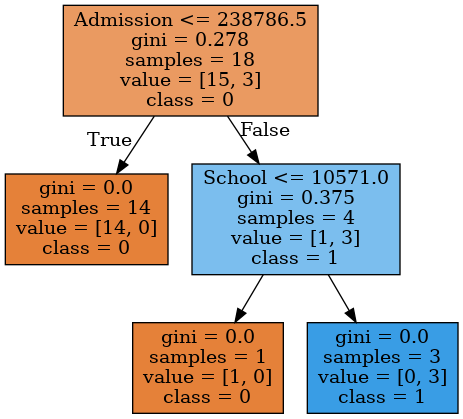

In [81]:
from sklearn import tree
import pydotplus
from IPython.display import Image
from graphviz import Digraph
import japanize_matplotlib

feature = b1_data_index[['Admission', 'Sponsor', 'Goods', 'School']].values
# feature = b1_data_index[['Admission', 'Sponsor', 'Goods', 'School']].values.tolist()
# feature = b1_data_index[['Admission', 'Sponsor', 'Goods', 'School']]
feature_names = ['Admission', 'Sponsor', 'Goods', 'School']

target = b1_data_index[['Output']].values
# target = b1_data_index[['Output']].values.tolist()
# target = b1_data_index[['Output']]
target_names = ['0', '1']

# モデル作成
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(feature, target)

# 可視化
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
#     proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


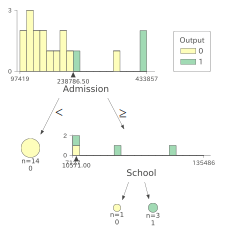

In [91]:
from dtreeviz.trees import dtreeviz

# 可視化
viz = dtreeviz(
    clf,
    feature, 
    np.array([0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]),
    target_name='Output',
    feature_names=feature_names,
#     class_names=[str(i) for i in target_names],
    class_names=['0', '1'],
    orientation='TD' # TD or LR
) 

display(viz)

In [49]:
type(b1_data_index[['Admission', 'Sponsor', 'Goods', 'School']].values)

numpy.ndarray

In [70]:
type(feature_names)

list

In [72]:
[str(i) for i in target_names]

['0', '1']

In [82]:
target

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [78]:
feature

array([[226984, 308104,  65078,  47317],
       [170164, 296598,  41070,  24400],
       [433857, 467110, 162332, 101808],
       [416258, 776973, 170614,  48944],
       [250589, 878325,  44454,  12478],
       [216555, 446445,   1676,   7127],
       [208836, 294569,  94221,  12300],
       [142465, 455079,  16256, 135486],
       [198458, 256180,  34876,  44534],
       [163866, 218031,  30383,  18939],
       [139909, 366379,  42105,  37406],
       [166581, 982418,  65531,  11581],
       [126779, 712358,  11898,  20854],
       [131398, 268174,  12218,  34003],
       [ 97419, 320924,  19406,  43710],
       [128796, 650668,  40588, 100073],
       [100836, 272633,  16833,   7552],
       [355863, 467890, 128155,   8664]])

In [89]:
np.array([0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0])

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
[str(i) for i in b1_data_index[['Output']].values]

['[0]',
 '[0]',
 '[1]',
 '[1]',
 '[1]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]',
 '[0]']